In [3]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

import os
from PIL import Image, ImageOps
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from tqdm import tqdm
import h5py

from dataset import hd52numpy, hd52numpy, lab2pil, img2hdf5, ab2bin, bin2ab, ColorizeHD5Dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### First Step, lets create a smaller version of the training and validation set

In [4]:
train_data_dir= '/tmp/data/train'
test_data_dir = '/tmp/data/test'

In [7]:
img2hdf5(test_data_dir, '/tmp/data/test_flower_128.hdf5', 128)

100%|██████████| 145/145 [00:03<00:00, 43.63it/s]


In [8]:
inp, lbl = hd52numpy('test_flower_128.hdf5')

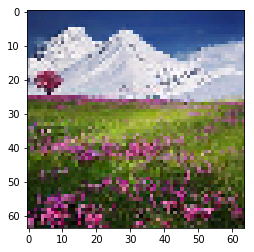

In [218]:
idx = 0
l = inp[idx, :, :, 0]
l = l[:,:,None]
ab = lbl[idx,:]
img = lab2pil(l, ab)
plt.imshow(img)


In [219]:
ab.min()

-0.21692468808425144

In [220]:
hist = ab2bin(ab)

In [222]:
abback = bin2ab(np.int16(hist))

In [223]:
abback.min()

-0.20784313725490197

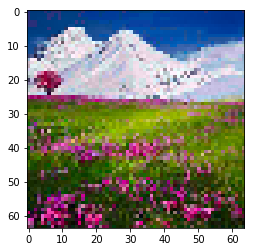

In [224]:
img = lab2pil(l, abback*1.3)
plt.imshow(img)

In [213]:
ds = ColorizeHD5Dataset('test_flower_64.hdf5')

In [214]:
a,b = next(iter(ds))
a.shape, b.shape

(torch.Size([1, 64, 64]), torch.Size([64, 64]))

### Create a Resnet classifier and see how well it works. 